# GLM: Linear regression

see: http://docs.pymc.io/notebooks/GLM-linear.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

## Generating data

In [83]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

true_regression_line = true_intercept + true_slope * x

y = true_regression_line + np.random.normal(scale=0.5, size=size)

data = dict(x=x, y=y)

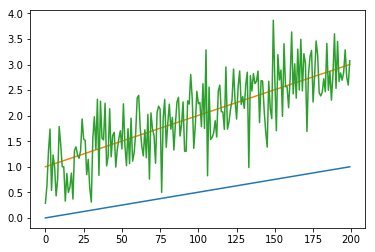

In [84]:
plt.plot(x)
plt.plot(true_regression_line)
plt.plot(y)

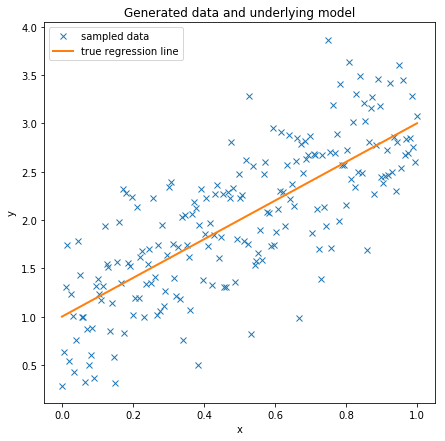

In [85]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0)

## Estimating the model

In [86]:
with Model() as model:
    sigma = HalfCauchy('sigma', beta=10, testval=1.0)
    intercept = Normal('intercept', mu=0, sd=20)
    x_coeff = Normal('x', mu=0, sd=20)
    
    likelihood = Normal('y', mu=intercept + x_coeff * x, sd=sigma, observed=y)
    trace = sample(3000, n_jobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 3500/3500 [00:04<00:00, 781.39it/s]


In [87]:
with Model() as model:
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, n_jobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 3500/3500 [00:04<00:00, 734.97it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d5d5f8>,
      dtype=object)

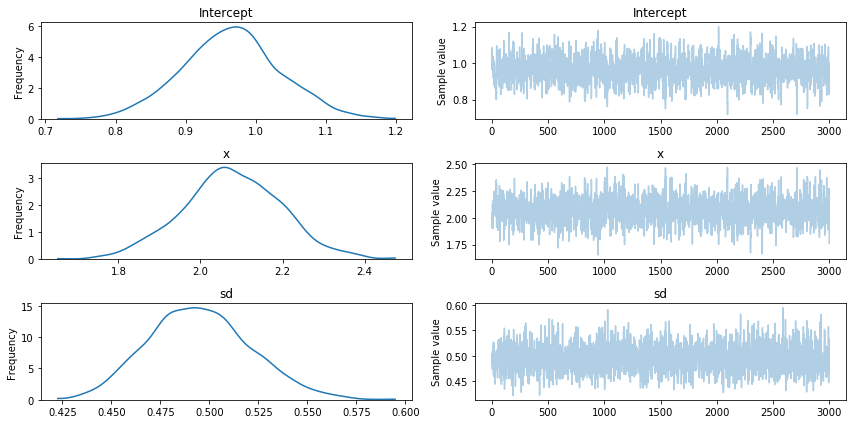

In [88]:
traceplot(trace)

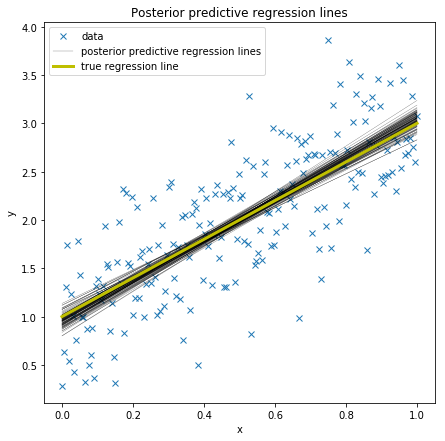

In [89]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100, label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')

## Generating MORE data

In [90]:
size = 1000
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

true_regression_line = true_intercept + true_slope * x

y = true_regression_line + np.random.normal(scale=0.5, size=size)

data = dict(x=x, y=y)

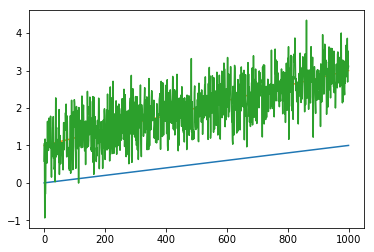

In [91]:
plt.plot(x)
plt.plot(true_regression_line)
plt.plot(y)

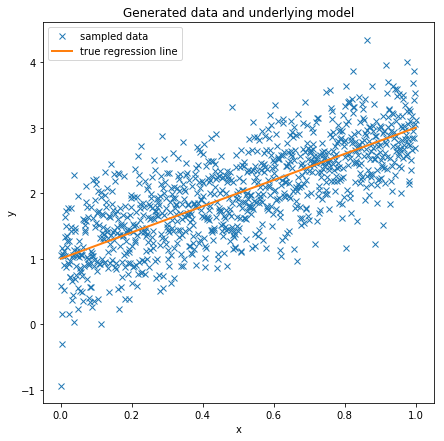

In [92]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0)

In [93]:
with Model() as model:
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, n_jobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 3500/3500 [00:06<00:00, 509.52it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab750f0>,
      dtype=object)

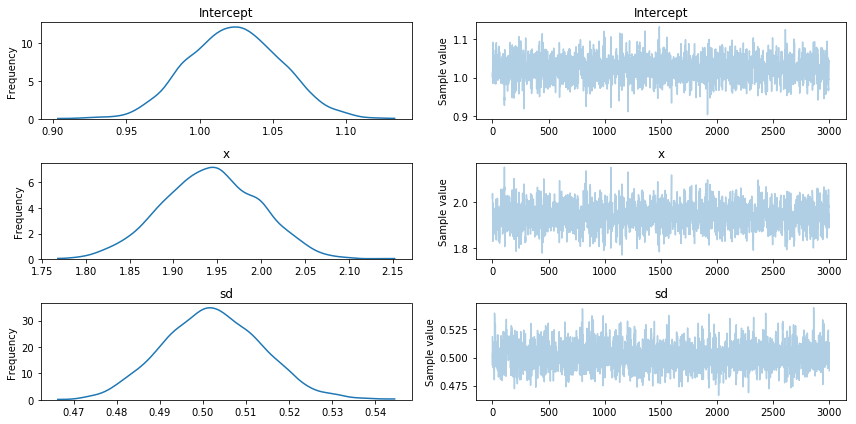

In [94]:
traceplot(trace)

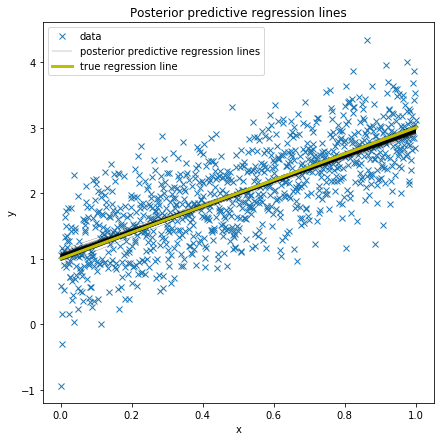

In [95]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100, label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')